## Packages

#### Pandas, Numpy, Matplotlib, random, nltk
#### String, Math, random, seaborn, itertools, collections

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

import string
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
from collections import Counter
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


import json
import collections
import random
import seaborn as sns

import nltk
from collections import Counter, OrderedDict

from itertools import islice

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/varchitalalwani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varchitalalwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Reading the train file with pandas 

In [3]:
train_file = pd.read_csv('train.csv')

#### Shape of the data
#### All the columns in the data
#### check for numm values in the data

In [4]:
print('The rows and columns of data', train_file.shape)

The rows and columns of data (159571, 8)


In [5]:
train_file.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
toxic_types = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [7]:
train_file.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

#### Adding a new column 'label' string form of all labels. Join all the 6 columns (toxic_types) 

In [8]:
train_file['label'] = train_file[train_file.columns[2:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

#### Get all the labels and total unique labels

In [9]:
unqiue_labels = train_file['label'].unique()
unqiue_labels, len(unqiue_labels)

(array(['000000', '111010', '100000', '101011', '101010', '101000',
        '100100', '100010', '101111', '000010', '001000', '111000',
        '101110', '111011', '111111', '100011', '100001', '001010',
        '111001', '111110', '000001', '101001', '000100', '001011',
        '110000', '110010', '110001', '001100', '100110', '000011',
        '111100', '110011', '101100', '110100', '000110', '100111',
        '100101', '001110', '001001', '110110', '110101'], dtype=object),
 41)

#### counting the number of data points for each unique label
#### Plotting number of comments vs. label counts

In [10]:
value_counts_label = train_file['label'].value_counts()
values = train_file['label'].value_counts().keys().tolist()
counts = train_file['label'].value_counts().tolist()
len(values), len(counts)

(41, 41)

In [11]:
value_counts_label

000000    143346
100000      5666
101010      3800
101000      1758
100010      1215
111010       989
101011       618
001000       317
000010       301
111011       265
001010       181
111000       158
100001       136
100011       134
101110       131
100100       113
111110        64
101111        56
000001        54
110000        41
101001        35
111111        31
000011        28
000100        22
001011        18
100110        16
110010        14
101100        11
110100        11
100101         7
110011         7
111001         6
111100         4
000110         3
100111         3
110001         3
001001         3
001100         2
001110         2
110110         1
110101         1
Name: label, dtype: int64

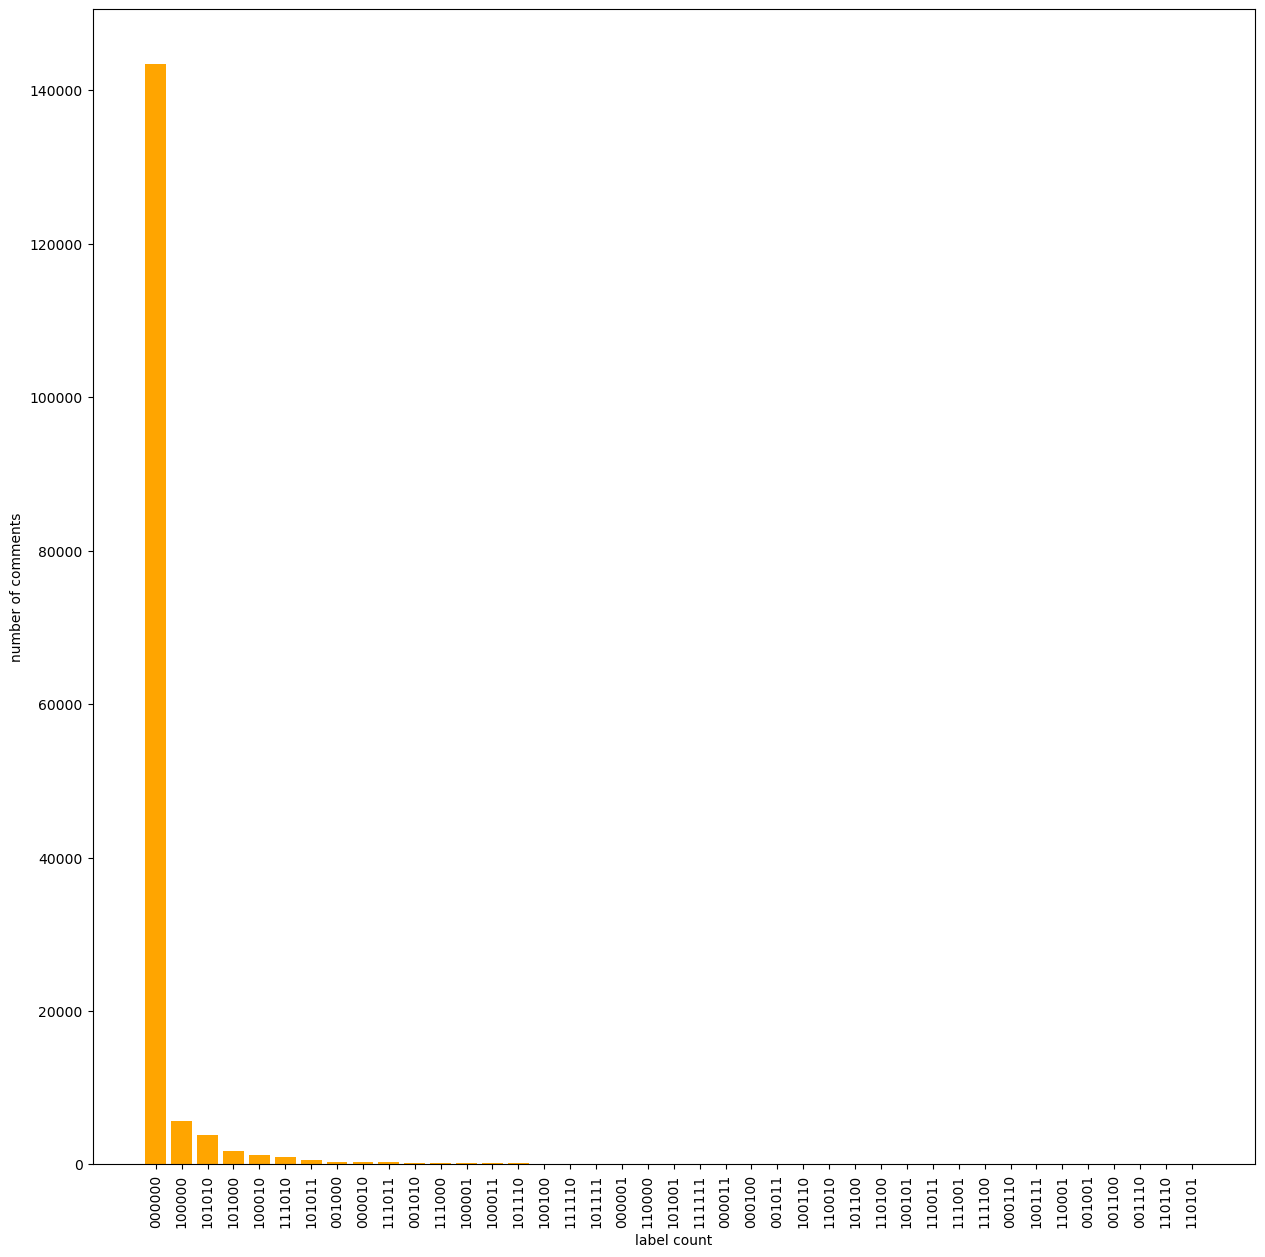

In [12]:
fig = plt.figure(figsize = (15, 15))
plt.bar(values, counts, color = 'orange')
plt.xlabel('label count')
plt.xticks(range(len(values)), values, rotation='vertical')
plt.ylabel('number of comments')
plt.savefig('9.1 comments vs labelcounts.png', dpi = 1200)
plt.show()

#### Let's see what amount of comments are in different labels in terms of percentage. 
#### w.r.t total comments (toxic + non-toxic) and only toxic
###### example, % comments toxic + threat w.r.t total comments
###### For every class and every possible combination 

In [13]:
def process_label(label, toxic_types):
    toxic_names = []
    
    #label - string type, iterate over it.
    #get the names of the classes where the value is 1.
    #return the names in the form of string joined with +
    
    for index, each in enumerate(label):
        if each == '1':
            toxic_names.append(toxic_types[index])
    if toxic_names == []:
        return 'non-toxic'
    else:
        
        return ' + '.join(toxic_names)
    
def stats(counts, values, total_comments, toxic_types):
    print('total count ->', total_comments)
    for index, count in enumerate(counts):
        percentage = (count/total_comments) * 100
        string = process_label(values[index], toxic_types)
        print(string, ' comments -> ', round(percentage, 2), ' % and count is ->', count)

print('*********************')
print('percentage count w.r.t total comments in the data')
print('*********************')
total_comments = train_file.shape[0]
stats(counts, values, total_comments, toxic_types) 


print('*********************')
print('percentage count w.r.t total toxic comments in the data')
print('*********************')
total_comments = train_file.shape[0] - value_counts_label[0] 
stats(counts[1:], values[1:], total_comments, toxic_types)

*********************
percentage count w.r.t total comments in the data
*********************
total count -> 159571
non-toxic  comments ->  89.83  % and count is -> 143346
toxic  comments ->  3.55  % and count is -> 5666
toxic + obscene + insult  comments ->  2.38  % and count is -> 3800
toxic + obscene  comments ->  1.1  % and count is -> 1758
toxic + insult  comments ->  0.76  % and count is -> 1215
toxic + severe_toxic + obscene + insult  comments ->  0.62  % and count is -> 989
toxic + obscene + insult + identity_hate  comments ->  0.39  % and count is -> 618
obscene  comments ->  0.2  % and count is -> 317
insult  comments ->  0.19  % and count is -> 301
toxic + severe_toxic + obscene + insult + identity_hate  comments ->  0.17  % and count is -> 265
obscene + insult  comments ->  0.11  % and count is -> 181
toxic + severe_toxic + obscene  comments ->  0.1  % and count is -> 158
toxic + identity_hate  comments ->  0.09  % and count is -> 136
toxic + insult + identity_hate  comment

#### Let's see what amount of comments are in different labels in terms of percentage. 
#### Now w.r.t only toxic classes
###### example, % comments toxic + threat w.r.t total comments
###### For every class and every possible combination 

In [14]:
def process_label(label, toxic_types):
    toxic_names = []
    for index, each in enumerate(label):
        if each == '1':
            toxic_names.append(toxic_types[index])
    if toxic_names == []:
        return 'non-toxic'
    else:
        
        return ' + '.join(toxic_names)
    
def get_specific(new_tox, values, counts):
    temp_values = []
    temp_counts = []
    
    #for every value we take the count, change the count from string to array (name b)
    #then multiply b with new_tox 
    #we want values where new_tox is already present 
    #[100101] - b multiply with [100000] - new_tox (and operation)
    #new_tox is toxic, b is toxic + hate + threat 
    #equate np.multiply result new_toxic. if true it means that the common class is same as new_tox.
    
    for index, each in enumerate(values):
        b = np.array([int(every) for every in list(each)])
        if np.multiply(b, new_tox).all() == new_tox.all():
            temp_values.append(each)
            temp_counts.append(counts[index])
    
    return temp_values, temp_counts
            
            
def specific_stats(counts, values, toxic_types, total_comments):
    #running loop for 6 times (as 6 classes)
    for index, tox_type in enumerate(toxic_types):
        print('*********************')
        tox = '000000'
        
        #tox will be all 6 classes as 6 times loop is running 
        tox = tox[:index] + '1' + tox[index+1:]
        if tox in values:
            #count for each class (6 class) example for 100000, 010000,...000001
            tox_specific_total = counts[values.index(tox)]
            print('percentage count w.r.t total', tox_type, '(',tox_specific_total,')', 'comment in the data')
            
            #tox is string, change to list, convert to list of integers, convert to array e.g., [1 0 0 0 0 0]
            new_tox = np.array([int(every) for every in list(tox)])
            temp_values, temp_counts = get_specific(new_tox, values, counts)
            for temp_index, temp_count in enumerate(temp_counts):
                if temp_values[temp_index] == tox:
                    continue
                temp_count += tox_specific_total
                percentage = (temp_count/total_comments) * 100
                string = process_label(temp_values[temp_index], toxic_types)
                
                print(string, ' comments -> ', round(percentage, 2), ' % and count is ->', temp_count)
        
        else:
            print('no single ', tox_type, 'comments in the data')
            
            



print('*********************')
print('percentage count w.r.t total tox-type comment in the data')

total_comments = train_file.shape[0] - value_counts_label[0]
specific_stats(counts[1:], values[1:], toxic_types, total_comments)

*********************
percentage count w.r.t total tox-type comment in the data
*********************
percentage count w.r.t total toxic ( 5666 ) comment in the data
toxic + obscene + insult  comments ->  58.34  % and count is -> 9466
toxic + obscene  comments ->  45.76  % and count is -> 7424
toxic + insult  comments ->  42.41  % and count is -> 6881
toxic + severe_toxic + obscene + insult  comments ->  41.02  % and count is -> 6655
toxic + obscene + insult + identity_hate  comments ->  38.73  % and count is -> 6284
obscene  comments ->  36.88  % and count is -> 5983
insult  comments ->  36.78  % and count is -> 5967
toxic + severe_toxic + obscene + insult + identity_hate  comments ->  36.55  % and count is -> 5931
obscene + insult  comments ->  36.04  % and count is -> 5847
toxic + severe_toxic + obscene  comments ->  35.9  % and count is -> 5824
toxic + identity_hate  comments ->  35.76  % and count is -> 5802
toxic + insult + identity_hate  comments ->  35.75  % and count is -> 580

#### Total toxic and non-toxic comments

In [15]:
print('total toxic comments ->',value_counts_label[0])
print('total non-toxic comments ->',value_counts_label[1:].sum())

total toxic comments -> 143346
total non-toxic comments -> 16225


In [16]:
toxic_types_counts = []
for each in toxic_types:
    toxic_types_counts.append(train_file[each].value_counts()[1])

#### Counts per toxic class

In [17]:
toxic_types_counts

[15294, 1595, 8449, 478, 7877, 1405]

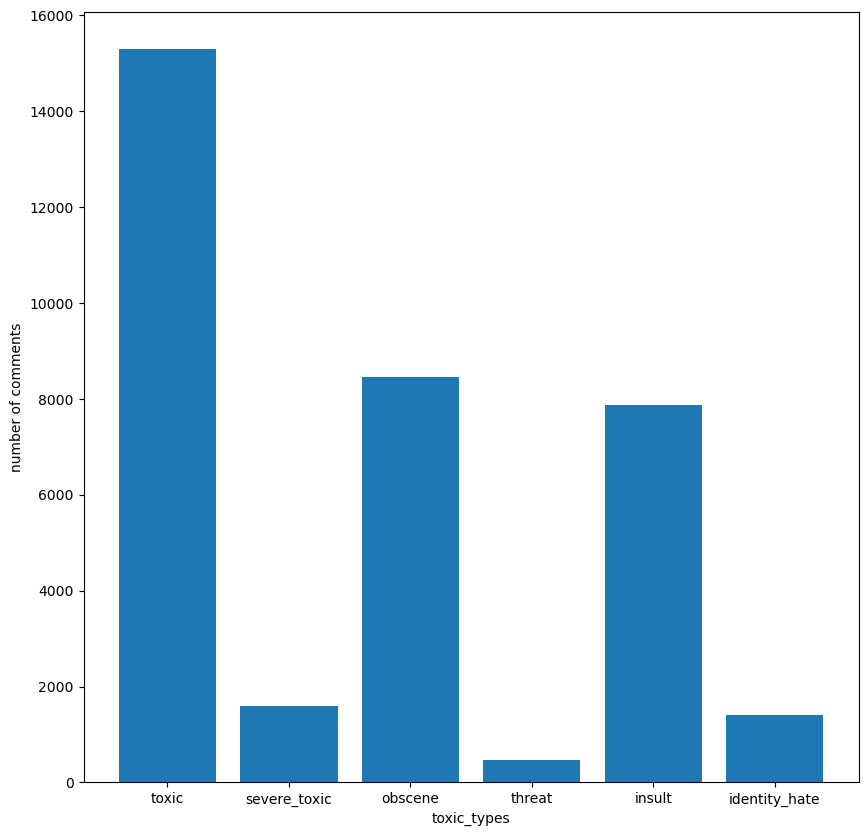

In [18]:
fig = plt.figure(figsize = (10, 10))
plt.bar(toxic_types, toxic_types_counts)
plt.xlabel('toxic_types')
plt.ylabel('number of comments')
plt.savefig('9.2 comments vs toxic types.png', dpi = 1200)
plt.show()

#### Fine average length, median, percentage capitalized letters, average word length, average exclamation, average question marks

In [19]:
train_file['length'] = train_file['comment_text'].apply(lambda x: len(x))
print("Average toxic comment length: %d" % int(np.mean(train_file.loc[train_file['label'] != '000000'].length)))
print("Average clean comment length: %d" % int(np.mean(train_file.loc[train_file['label'] == '000000'].length)))

Average toxic comment length: 303
Average clean comment length: 404


In [20]:
print("Median toxic comment length: %d" % int(np.median(train_file.loc[train_file['label'] != '000000'].length)))
print("Median clean comment length: %d" % int(np.median(train_file.loc[train_file['label'] == '000000'].length)))

Median toxic comment length: 128
Median clean comment length: 216


In [21]:
def pct_caps(s):
    return sum([1 for c in s if c.isupper()]) / (sum(([1 for c in s if c.isalpha()])) + 1)
train_file['caps'] = train_file.comment_text.apply(lambda x: pct_caps(x))
print("Percent of capitalized characters in toxic comments: %d%%" % int(100 * np.mean(train_file[(train_file.label != '000000')].caps)))
print("Percent of capitalized characters in clean comments: %d%%" % int(100 * np.mean(train_file[(train_file.label == '000000')].caps)))


Percent of capitalized characters in toxic comments: 14%
Percent of capitalized characters in clean comments: 5%


In [22]:
def word_length(s):
    s = s.split(' ')
    return np.mean([len(w) for w in s if w.isalpha()])
train_file['word_length'] = train_file.comment_text.apply(lambda x: word_length(x))

print("Average word length in toxic comments: %.1f" % np.mean(train_file[(train_file.label != '000000')].word_length))
print("Average word length in clean comments: %.1f" % np.mean(train_file[(train_file.label == '000000')].word_length))


/Users/varchitalalwani/miniconda3/envs/TOXIC_COMMENTS/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Average word length in toxic comments: 4.1
Average word length in clean comments: 4.4


In [23]:
train_file['exclamation'] = train_file.comment_text.apply(lambda s: len([c for c in s if c == '!']))
print("Exclamations in toxic comments: %.1f" % np.mean(train_file[(train_file.label != '000000')].exclamation))
print("Exclamations in clean comments: %.1f" % np.mean(train_file[(train_file.label == '000000')].exclamation))


Exclamations in toxic comments: 3.5
Exclamations in clean comments: 0.3


In [24]:
train_file['question'] = train_file.comment_text.apply(lambda s: len([c for c in s if c == '?']))
print("Question marks in toxic comments: %.1f" % np.mean(train_file[(train_file.label != '000000')].question))
print("Question marks in clean comments: %.1f" % np.mean(train_file[(train_file.label == '000000')].question))

Question marks in toxic comments: 0.6
Question marks in clean comments: 0.4


#### Change every thing to lower text

In [25]:
def convert_to_lower(text):
    return text.lower()

In [26]:
train_file['comment_text'] = train_file['comment_text'].apply(lambda x: convert_to_lower(x))

#### remove non-alphanumeric characters

In [27]:
def remove(a):
    a = re.sub(r"[^a-zA-Z]", ' ', a) 
    return " ".join(a.split())
train_file['comment_text'] = train_file['comment_text'].apply(lambda x: remove(x))
train_file['comment_text'].head(5), train_file.loc[train_file['id'] == '8e29eaa46c25bb44']['comment_text'], train_file.loc[train_file['id'] == '1091689382892a88']['comment_text']


(0    explanation why the edits made under my userna...
 1    d aww he matches this background colour i m se...
 2    hey man i m really not trying to edit war it s...
 3    more i can t make any real suggestions on impr...
 4    you sir are my hero any chance you remember wh...
 Name: comment_text, dtype: object,
 53181    p e n i s
 Name: comment_text, dtype: object,
 6201    securityfuck homeland securityfuck homeland se...
 Name: comment_text, dtype: object)

#### remove stop words

In [28]:
def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

In [29]:
train_file['comment_text'] = train_file['comment_text'].apply(lambda x: remove_stopwords(x))

In [30]:
train_file['comment_text'].head(10)


0    explanation edits made username hardcore metal...
1    aww matches background colour seemingly stuck ...
2    hey man really trying edit war guy constantly ...
3    make real suggestions improvement wondered sec...
4                        sir hero chance remember page
5             congratulations well use tools well talk
6                          cocksucker piss around work
7    vandalism matt shirvington article reverted pl...
8    sorry word nonsense offensive anyway intending...
9                 alignment subject contrary dulithgow
Name: comment_text, dtype: object

#### Removing the empty strings

In [31]:
train_file = train_file.loc[train_file['comment_text'] != ' ']
train_file = train_file.loc[train_file['comment_text'] != '']

#### Find the average length, max length, median length, 

In [32]:
train_file['length'] = train_file['comment_text'].apply(lambda x: len(x))
print("Average toxic comment length: %d" % int(np.mean(train_file.loc[train_file['label'] != '000000'].length)))
print("Average clean comment length: %d" % int(np.mean(train_file.loc[train_file['label'] == '000000'].length)))

print("max toxic comment length: %d" % int(max(train_file.loc[train_file['label'] != '000000'].length)))
print("max clean comment length: %d" % int(max(train_file.loc[train_file['label'] == '000000'].length)))

Average toxic comment length: 190
Average clean comment length: 253
max toxic comment length: 5000
max clean comment length: 5000


In [33]:
print("Median toxic comment length: %d" % int(np.median(train_file.loc[train_file['label'] != '000000'].length)))
print("Median clean comment length: %d" % int(np.median(train_file.loc[train_file['label'] == '000000'].length)))

Median toxic comment length: 77
Median clean comment length: 133


In [34]:
max_len = train_file.length.max()
print("Max comment length is %d." % max_len)

Max comment length is 5000.


#### all_words list - all words in the text
#### word_counts dictionary - unique words with number of times that word is repeated
#### word_index dictionary - unique words as keys and values will be index
#### tokenize() - to tokeinze the comment (get the indices)

In [35]:
all_words = []
for row in train_file['comment_text']:
    all_words.extend(row.split())
len(all_words)

5535194

In [36]:
word_counts = Counter(all_words)
len(word_counts)

168658

In [37]:
word_index = {}
for index, each in enumerate(all_words):
    if each in word_index.keys():
        continue
    word_index[each] = index
len(word_index)

168658

In [38]:
def tokenize(word_index, text):
    tokenized_words = []
    for each in text:
        tokenized_words.append(word_index[each])
    return tokenized_words

In [39]:
def word_plot(word_cnt, num_words, title, name):
    plt.figure(title, figsize=(24, 12))
    plt.suptitle(title, fontsize=40)
    sns.barplot(x= [tup[0] for tup in word_cnt[0:num_words]], 
                y = [tup[1] for tup in word_cnt[0:num_words]])
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=35, ha='right')
    plt.savefig(name, dpi = 1200)
    plt.show()

In [40]:

def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))


#### Tokenize the comments from every class and then plot top 50 most repeated word for that class.

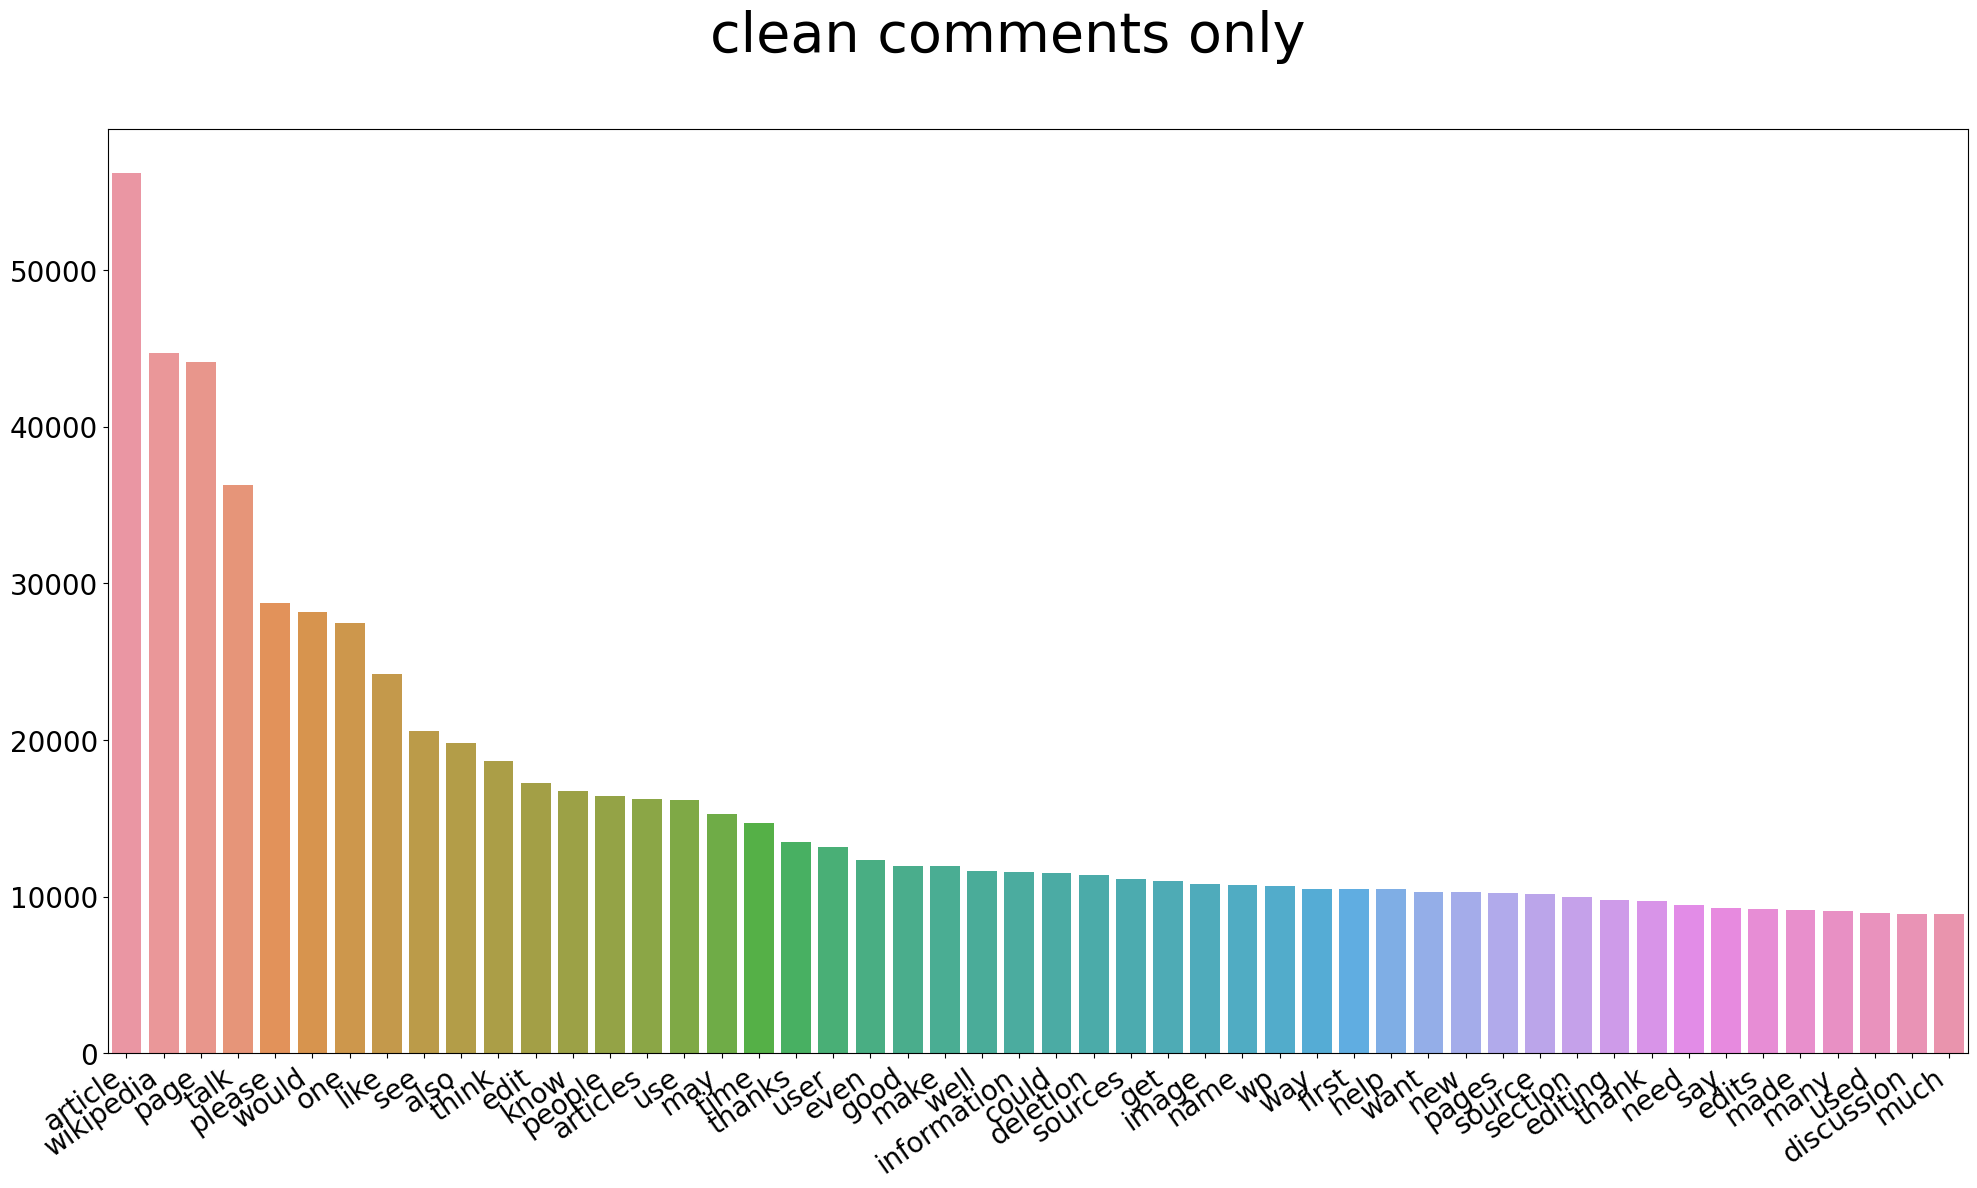

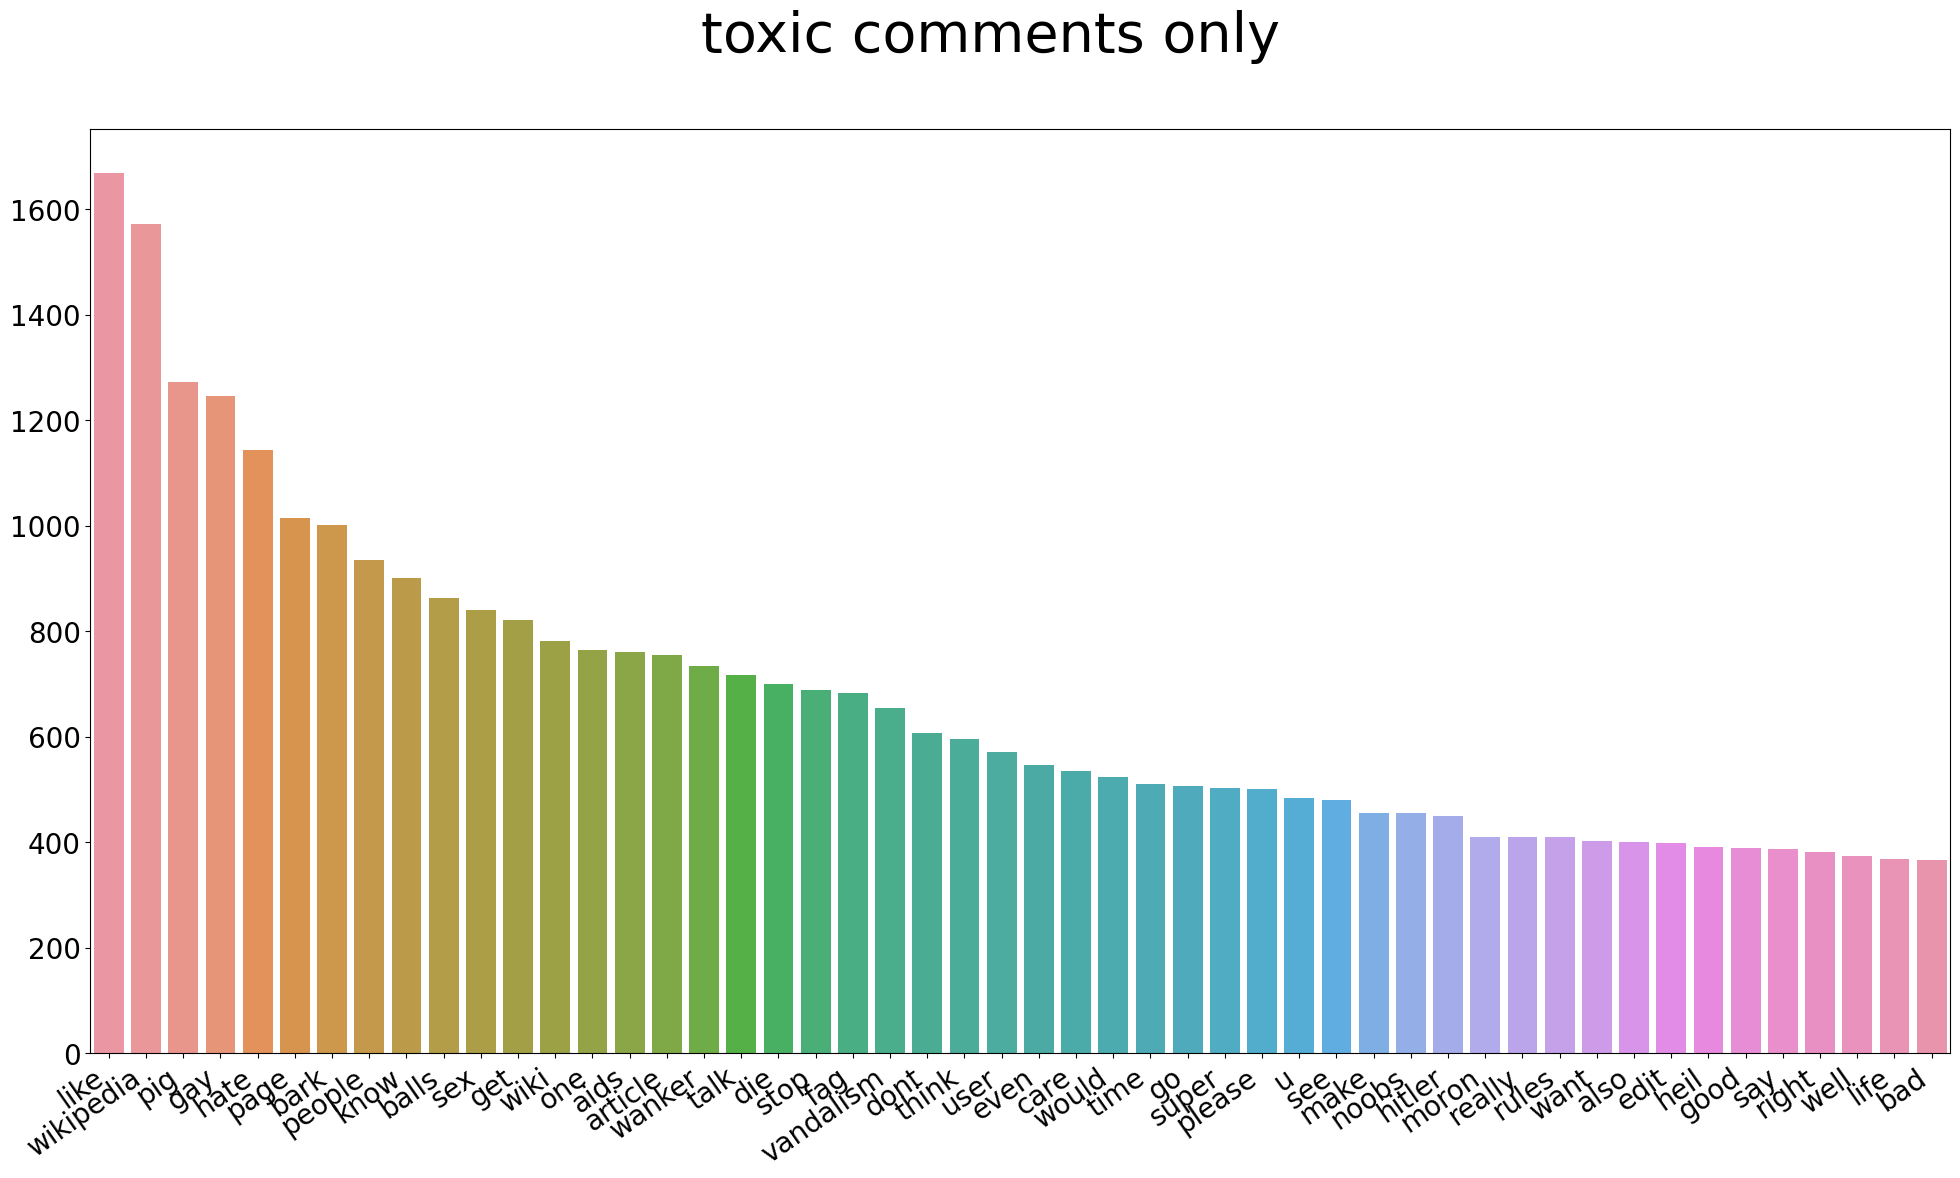

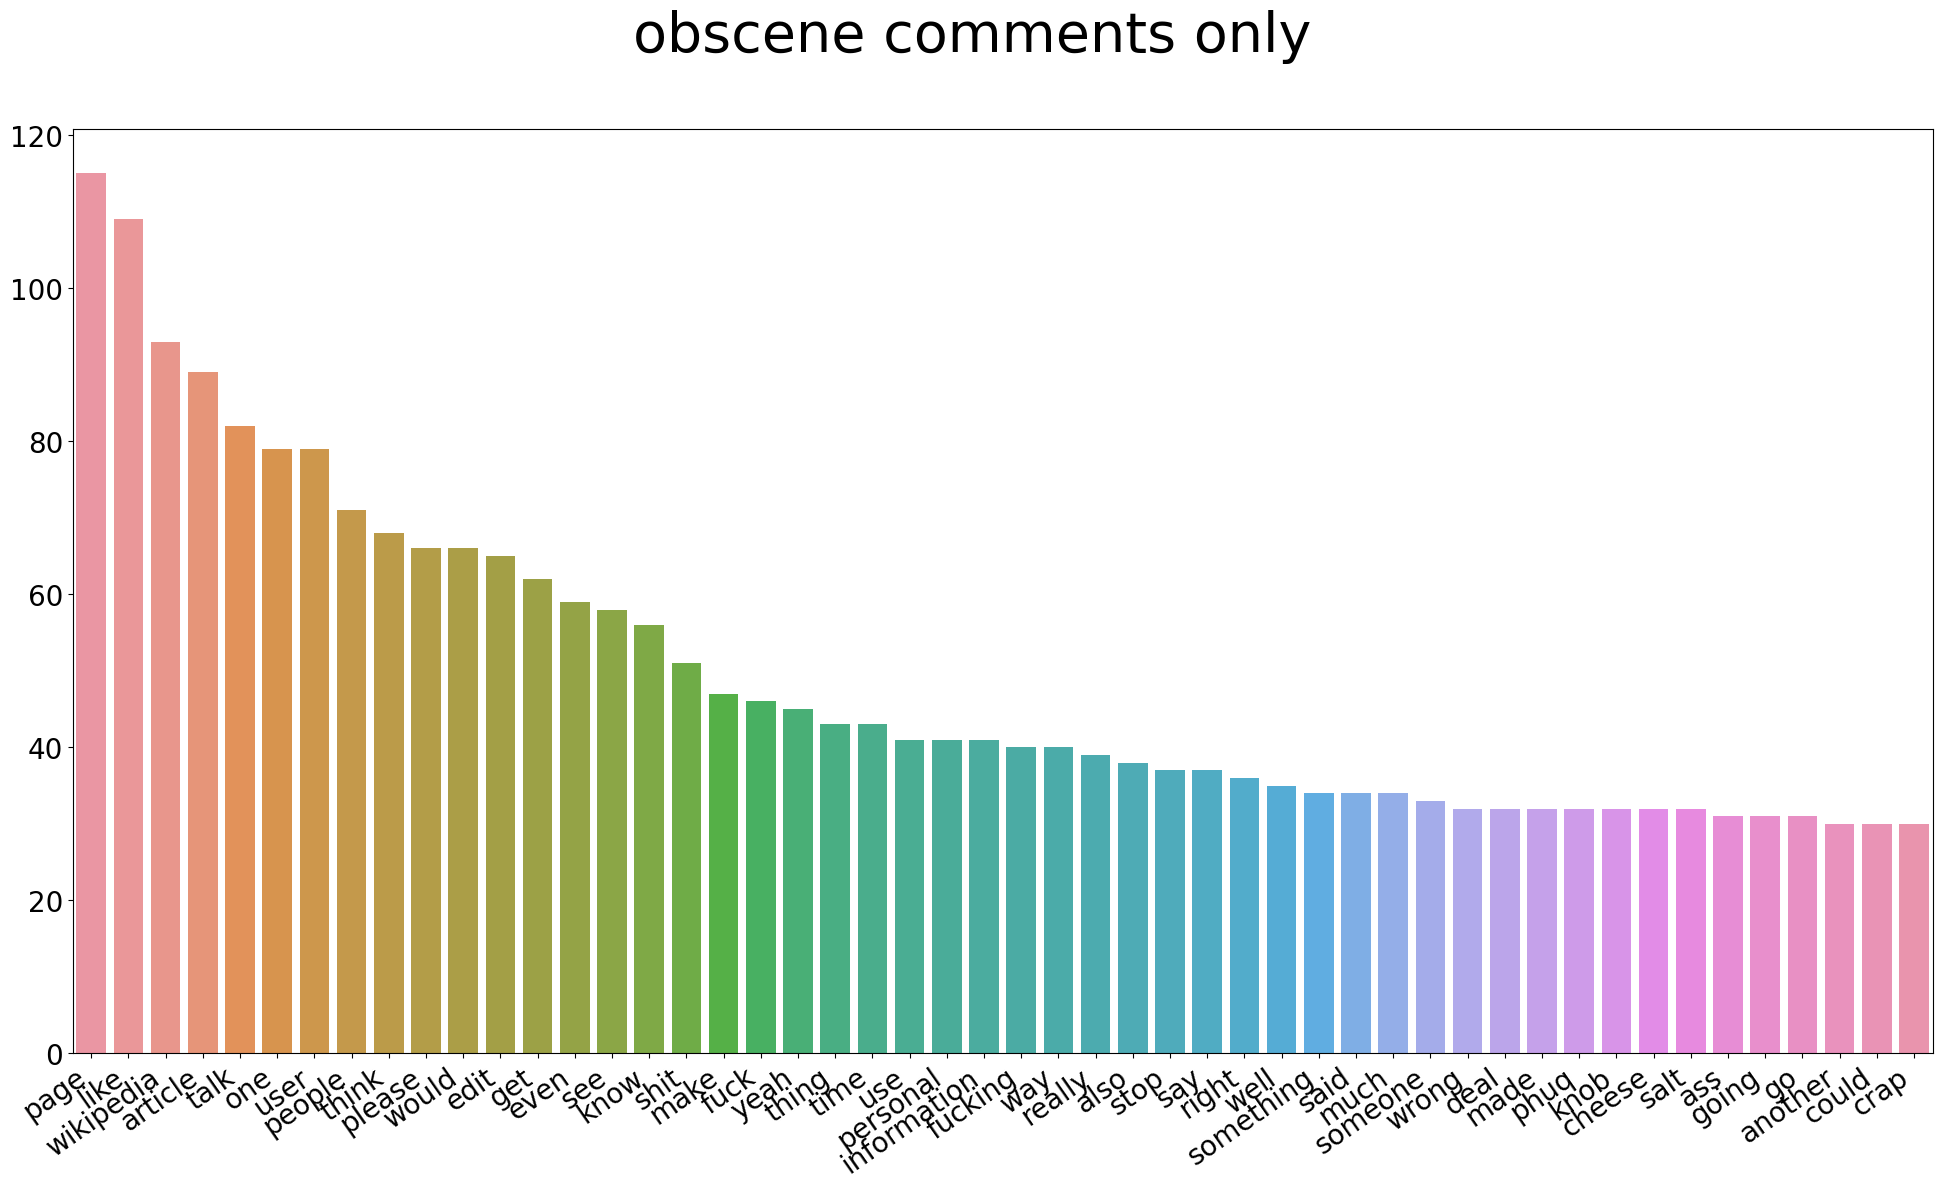

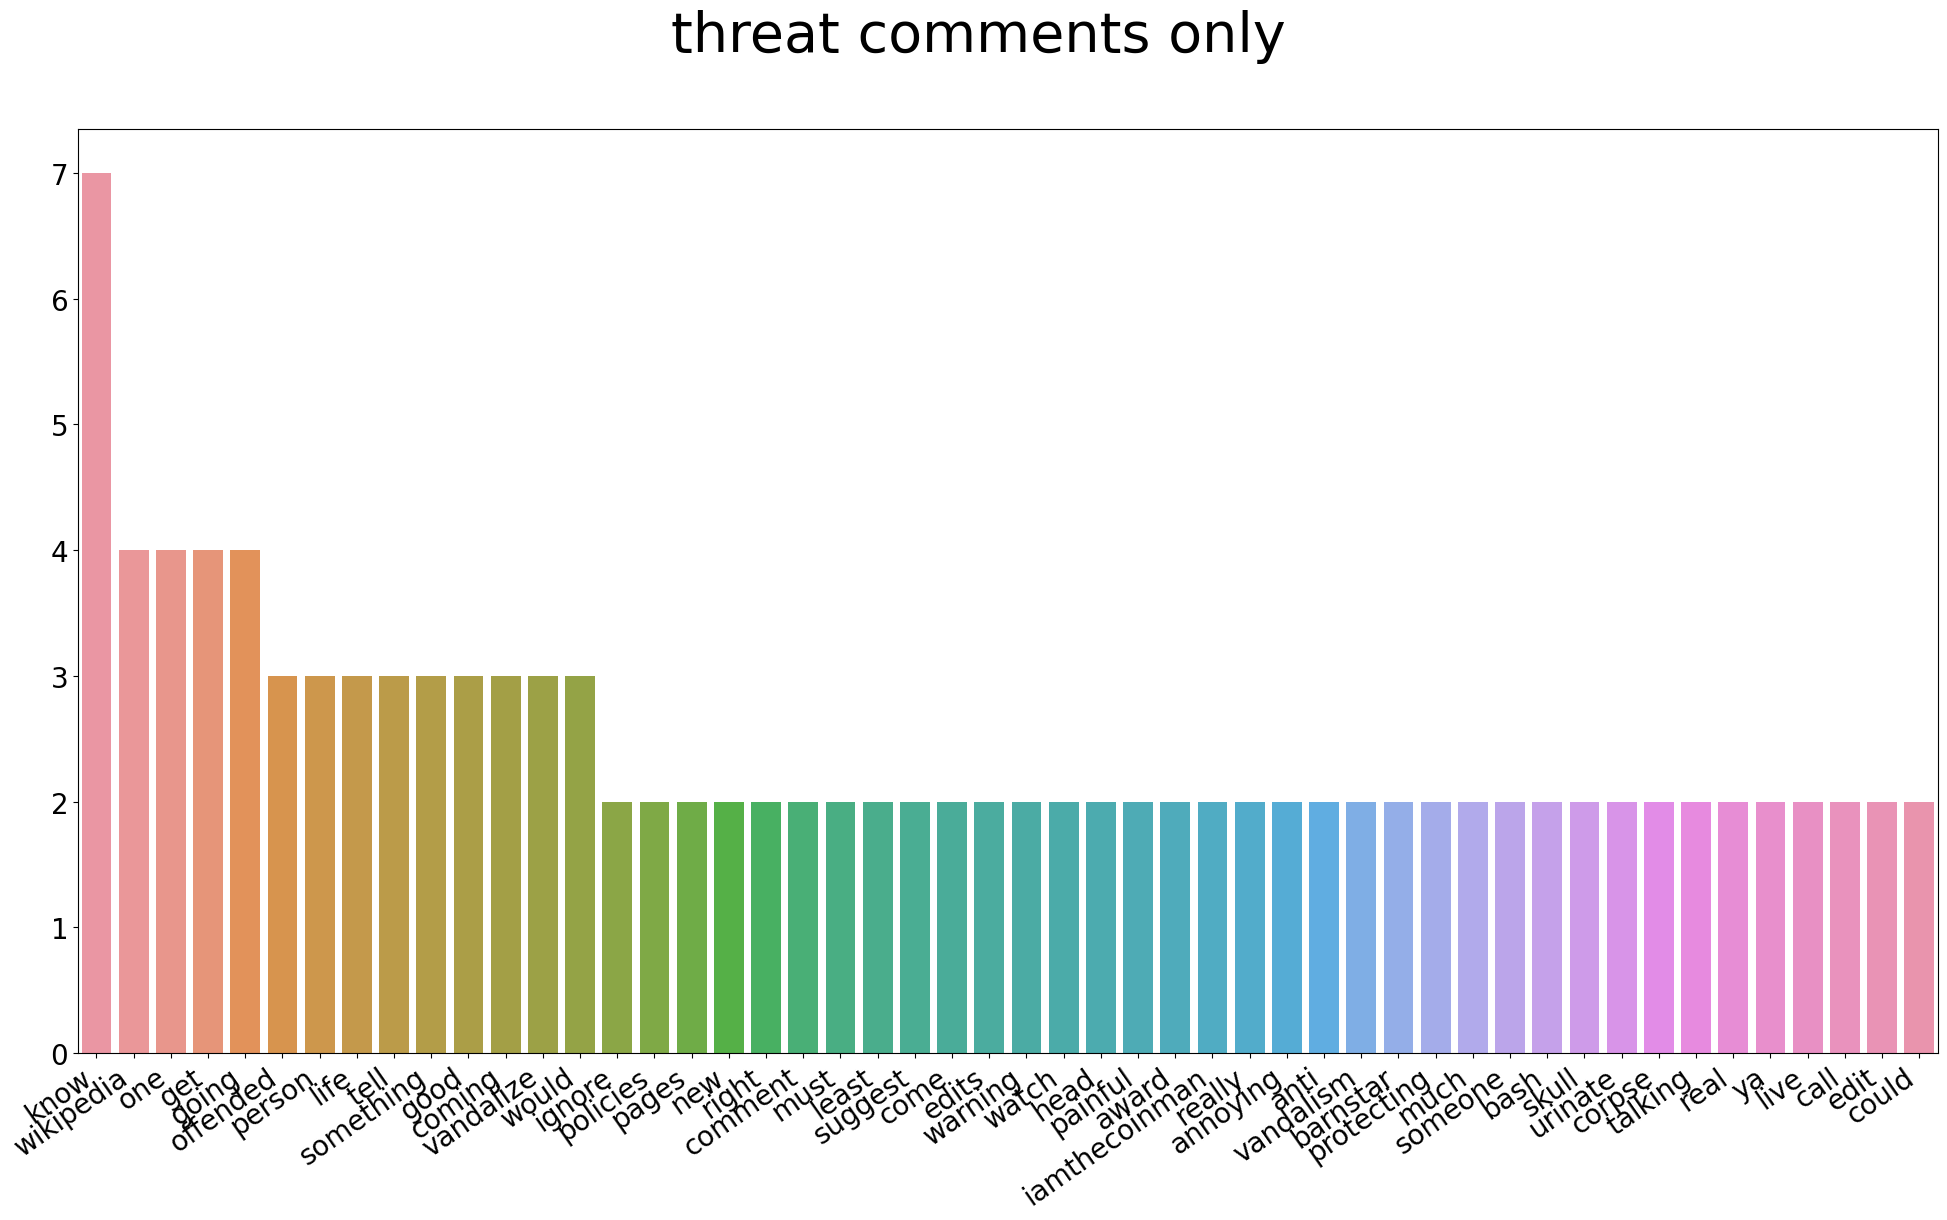

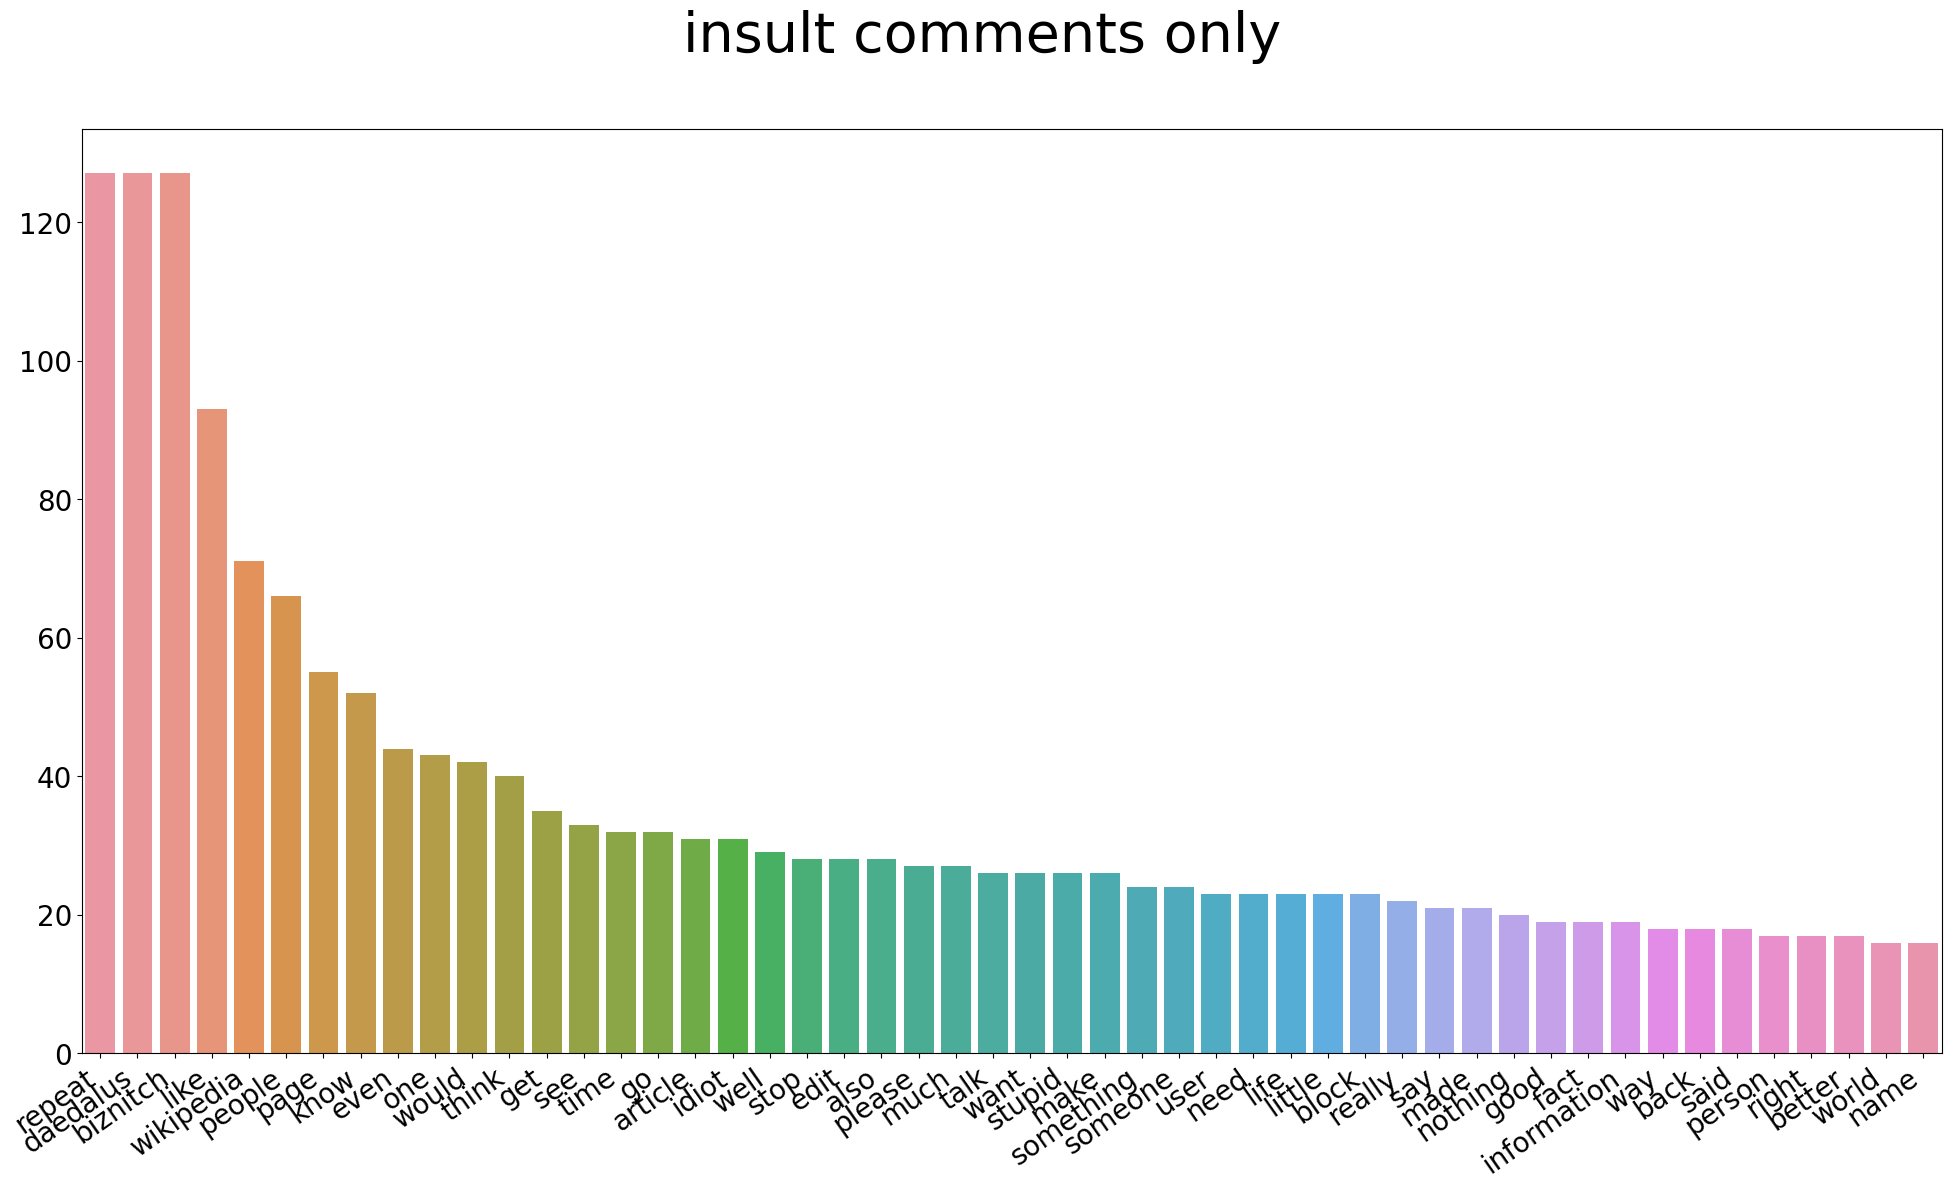

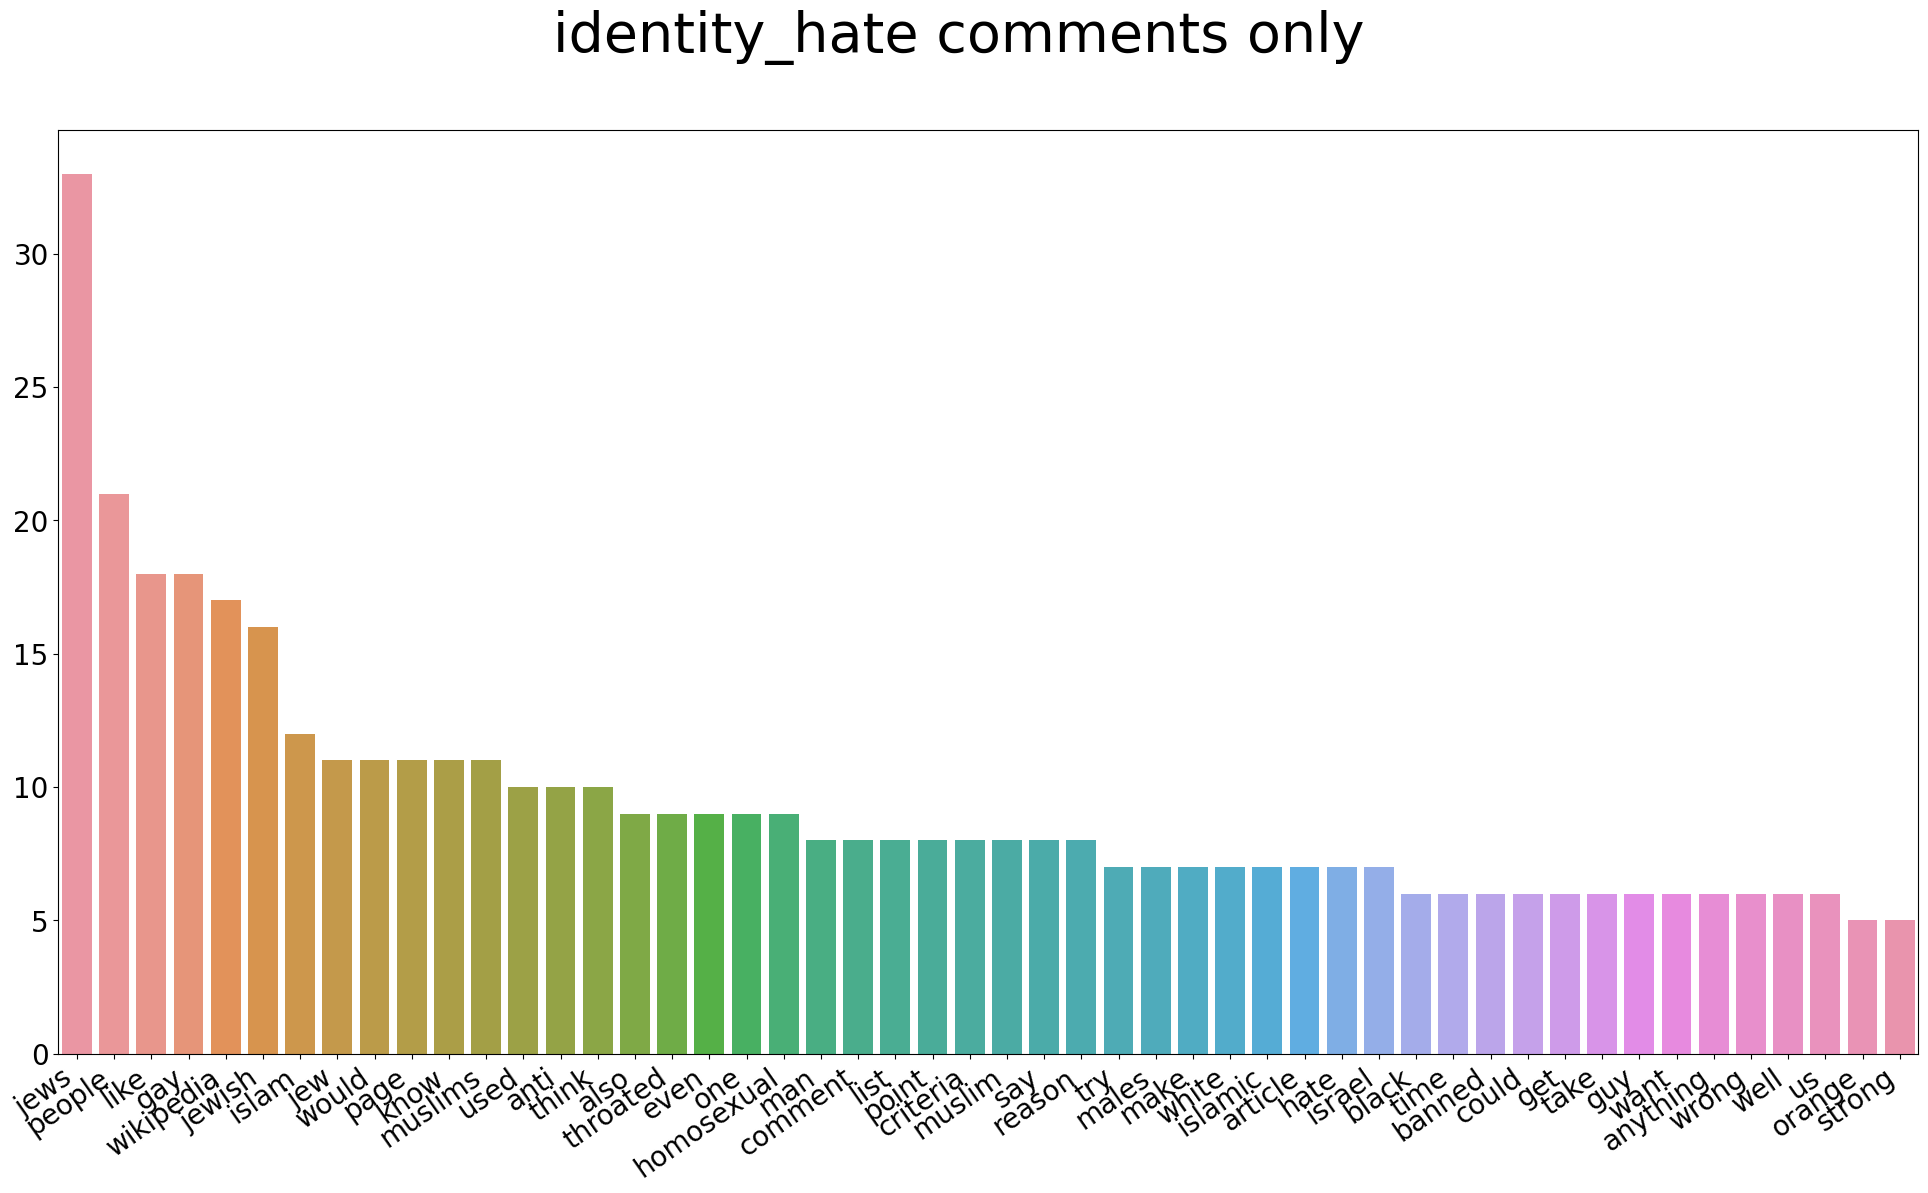

In [41]:
def get_plot(lab, title, train_file, name):
    comments = train_file.loc[train_file['label'] == lab]['comment_text'].reset_index(drop = True)
    words = []
    for each in comments:
        words.extend(each.split())
    counts = Counter(words)
    sorted_dict = dict(sorted(counts.items(), key=lambda x:x[1], reverse=True))

    n_items = 50
    items = take(n_items, sorted_dict.items())
    word_plot(items, n_items, title, name)

name = '9.3 clean comments only.png'
get_plot('000000', 'clean comments only', train_file[['label', 'comment_text']], name)

name = '9.4 toxic comments only.png'
get_plot('100000', 'toxic comments only', train_file[['label', 'comment_text']], name)

#get_plot('010000', 'severe_toxic comments only', train_file[['label', 'comment_text']])
name = '9.5 obscene comments only.png'
get_plot('001000', 'obscene comments only', train_file[['label', 'comment_text']], name)

name = '9.6 threat comments only.png'
get_plot('000100', 'threat comments only', train_file[['label', 'comment_text']], name)

name = '9.7 insult comments only.png'
get_plot('000010', 'insult comments only', train_file[['label', 'comment_text']], name)

name = '9.8 identity_hate comments only.png'
get_plot('000001', 'identity_hate comments only', train_file[['label', 'comment_text']], name)

#### Tokenize all comments, find the percentage of comments having more than 10 words, 50, 100 etc. words.

In [42]:
text_sents = []
for i in train_file['comment_text']:
    temp = tokenize(word_index, i.split())
    text_sents.append(temp)
train_file['tokenized'] =  text_sents 

In [43]:
max_len = train_file.tokenized.map(lambda x: len(x)).max()
print("Max comment length is %d." % max_len)

Max comment length is 1250.


In [44]:
seq_lens = train_file.tokenized.map(lambda x: len(x))

In [45]:
for i in [10, 50, 100, 200, 300, 400, 500, 1000, 1300]:
    select = (seq_lens > i)
    print('%.2f%% of comments have more than %d words.' % ((np.sum(select)/len(seq_lens))*100, i))

68.78% of comments have more than 10 words.
17.75% of comments have more than 50 words.
6.48% of comments have more than 100 words.
2.07% of comments have more than 200 words.
1.01% of comments have more than 300 words.
0.37% of comments have more than 400 words.
0.07% of comments have more than 500 words.
0.01% of comments have more than 1000 words.
0.00% of comments have more than 1300 words.


#### Save the text after cleaning the text.

In [46]:
cols = ['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'label']
train_file[cols].to_csv('clean.csv', index = False)


#### get toxic and non toxic comments

In [47]:
all_toxic = train_file[(train_file.label != '000000')].reset_index(drop = True)
non_toxic = train_file[(train_file.label == '000000')].reset_index(drop = True)

In [48]:
all_toxic.shape, non_toxic.shape

((16225, 15), (143288, 15))